In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_data = pd.read_csv("train.csv")
user_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


first lets check how many people are married and by age 

Text(0.5, 0, 'No. of People')

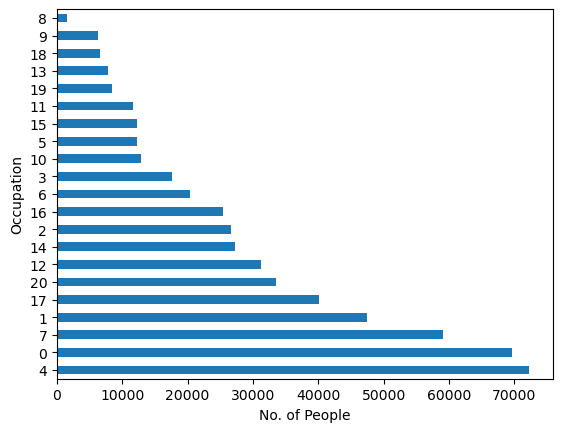

In [3]:
ax = user_data['Occupation'].value_counts().plot.barh()
ax.set_xlabel("No. of People")

In [4]:
top_occupations = user_data.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

<Axes: xlabel='Occupation', ylabel='Mean Purchase Amount per order'>

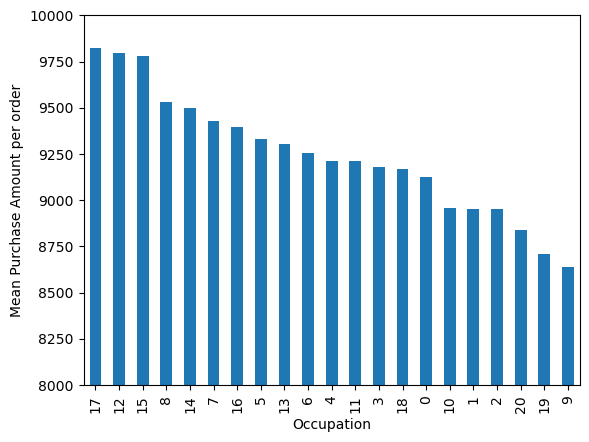

In [5]:
top_occupations.plot.bar(ylim=[8000, 10000], ylabel="Mean Purchase Amount per order")

### Lets see if being married influences product category

In [6]:
married_ratio = user_data['Marital_Status'].value_counts().rename(index={0:"Unmarried",
                                                        1:"Married"})# .plot.pie()

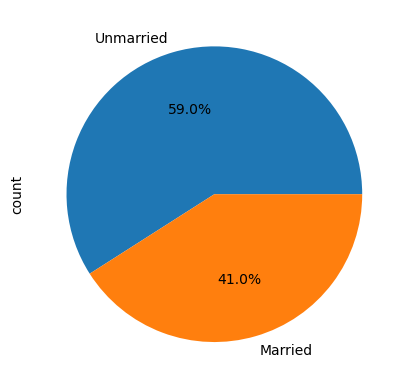

In [7]:
ax = married_ratio.plot.pie(autopct='%1.1f%%')

In [8]:
grp = user_data.groupby('Occupation')['Product_Category_1'].value_counts()

In [9]:
occupation_cat = grp.groupby(level=0).apply(lambda x: x[:5]).droplevel(0).unstack(level=1)

In [10]:
sum = occupation_cat.sum(axis=1)
sum.name = "Sum"

In [11]:
occupation_cat.head()

Product_Category_1,5,1,8,11,2,6,3
Occupation,,,,,,,
0,18985.0,17643.0,14087.0,3752.0,2971.0,NaN,NaN
1,13169.0,10315.0,11998.0,NaN,1922.0,1767.0,NaN
2,7613.0,5742.0,6266.0,1151.0,1110.0,NaN,NaN
3,5286.0,3944.0,3843.0,693.0,666.0,NaN,NaN
4,20459.0,19238.0,13830.0,3192.0,NaN,NaN,3306.0


In [12]:
merged.sort_values(by='Sum', ascending=False).iloc[:6, :7].plot.bar()

NameError: name 'merged' is not defined

In [ ]:
user_data['Product_ID'].value_counts()

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

In [ ]:
gender_product  = user_data.groupby('Gender')['Product_ID'].value_counts().groupby(level=0).nlargest(5).droplevel(0)

In [ ]:
gender_product = gender_product.reset_index()

In [ ]:
gender_product

,Gender,Product_ID,count
0,F,P00265242,508
1,F,P00220442,440
2,F,P00058042,387
3,F,P00255842,375
4,F,P00110742,365
5,M,P00265242,1372
6,M,P00025442,1267
7,M,P00110742,1247
8,M,P00112142,1223
9,M,P00057642,1212


In [ ]:
female= gender_product[gender_product['Gender']=="F"]

In [ ]:
male = gender_product[gender_product['Gender']!="F"]

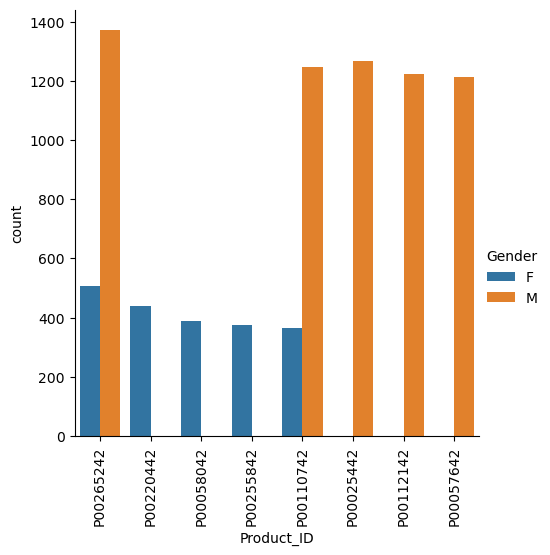

In [ ]:
ax = sns.catplot(data=gender_product, x='Product_ID', y='count', hue='Gender', kind='bar')
ax.tick_params(axis='x', labelrotation=90)

In [14]:
user_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
city_g = user_data.groupby(["City_Category", "Stay_In_Current_City_Years"])

In [23]:
sum_city = city_g['Purchase'].sum()

In [28]:
sum_city = sum_city.unstack(1)

<Axes: xlabel='City_Category'>

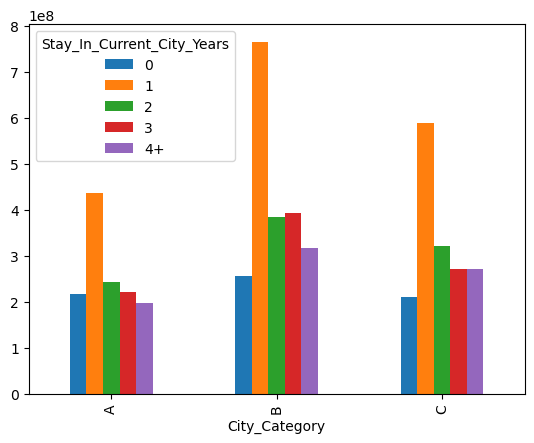

In [30]:
sum_city.plot.bar()

In [31]:
marriage_g = user_data.groupby(['Gender', 'Age', 'Marital_Status'])

In [35]:
marriage_gender = marriage_g['Marital_Status'].count()

In [38]:
marriage_f = marriage_gender["F"]
marriage_m = marriage_gender["M"]

In [42]:
marriage_f = marriage_f.unstack(1).fillna(0)
marriage_m = marriage_m.unstack(1).fillna(1)

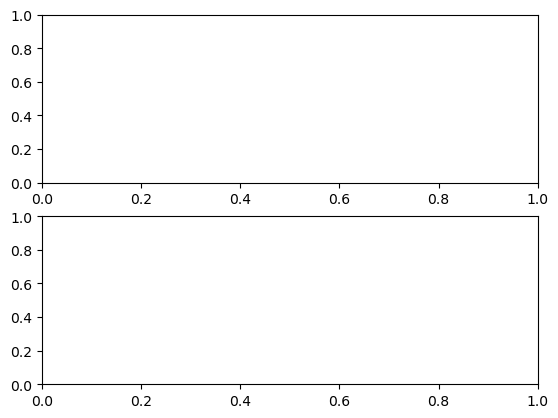

In [40]:
fig, ax = plt.subplots(2, 1)
marriage_f